## Practical 2: Dimensionality Reduction

### Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

### Data

In [2]:
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
X = digits.data

In [5]:
X.shape

(1797, 64)

In [6]:
np.unique(X)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

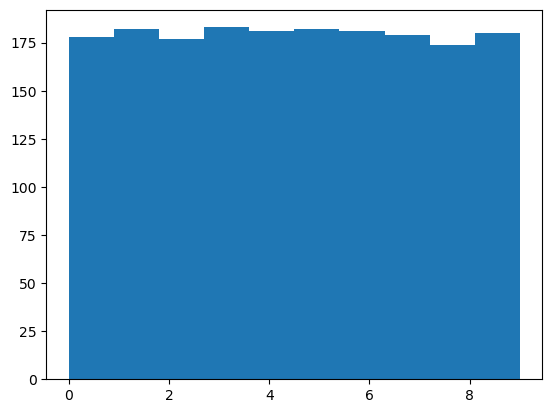

In [7]:
plt.hist(digits.target, bins=10)

### 1. Exploratory data analysis

(-0.5, 7.5, 7.5, -0.5)

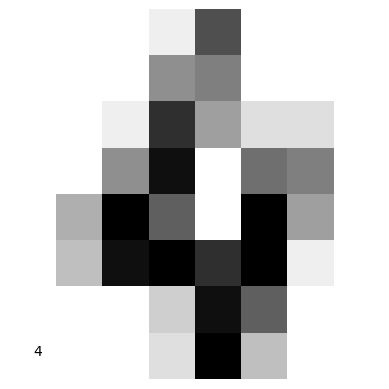

In [8]:
# Plot example
plt.imshow(X[4, :].reshape(8, 8), cmap=plt.cm.binary)
plt.text(0, 7, str(digits.target[4]))
plt.axis("off")

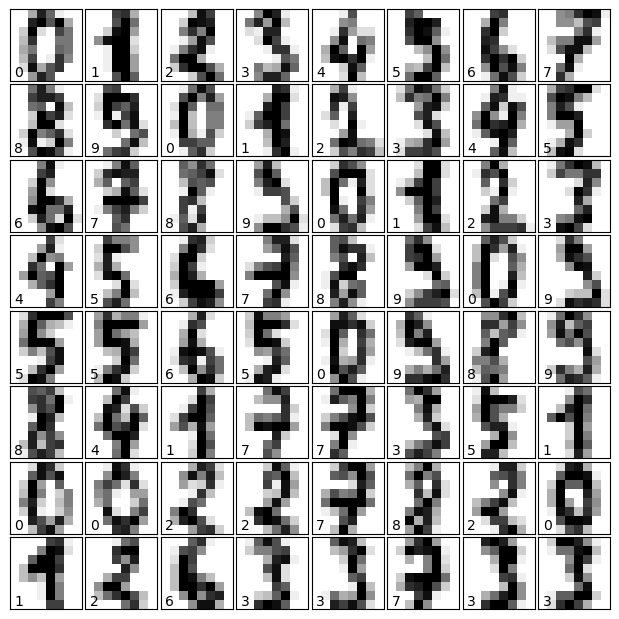

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    #ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.imshow(X[i, :].reshape(8, 8), cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))

### 2. Dimensionality reduction using PCA

The goal in this section is to reduce each  8×8=64  dimensional image vectors to a vector of  𝑀  dimensions, where  𝑀<64 .

Question: 
- Is neccesary to normalize these data?
- Complete the code to perform PCA

In [10]:
# Answer: Complete the code
# M = 2     # uncomment and set M to desired value
# Normalise the data to be zero-mean is not needed
# Answer: Add your own code here
pcaDD = PCA(n_components=2)

# Fit the principal components analysis model
# Answer: Add your own code here
pcaDD.fit(X)

# Show the first two eigen vectors corresponding to the largest eigen values
# Answer: Add your own code here
pcaDD.components_

# Project the data to the lower-dimensional space
# Answer: Add your own code here
X_projected = pcaDD.transform(X)

To visualise the effect of the dimensionality reduction, we can project the reduced data back to the original feature space, and then plot the image. You can do this by (un)commenting the appropriate lines below.

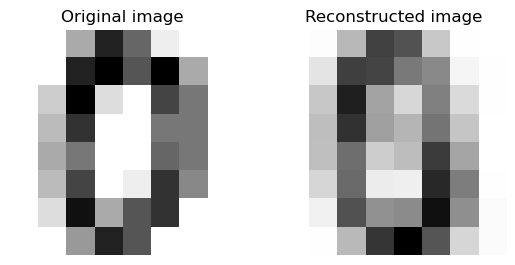

In [11]:
# Reconstruction
# X: original data 
# W:  projection vectors
# X_projected: projected data  (scores)
# X_reconstructed = np.dot(X_projected, W.T)   
# X_reconstructed = pca.inverse_transform(X_projected) # uncomment

X_reconstructed = pcaDD.inverse_transform(X_projected)

# Plot the original and the reconstructed image
i_data = 0
plt.subplot(1, 2, 1)
plt.imshow(X[i_data, :].reshape(8, 8), cmap=plt.cm.binary) # uncomment
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Reconstructed image")
plt.imshow(X_reconstructed[i_data, :].reshape(8, 8), cmap=plt.cm.binary) # uncomment
plt.axis("off")
plt.show()

Question:

Repeat the above with different values of  𝑀  apart from  𝑀=2 . What is the effect on the reconstructions?

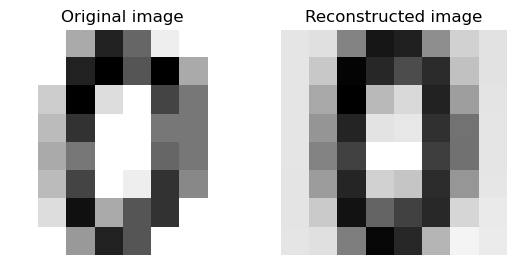

In [12]:
# Answer: Complete the code

pcaDD = PCA(n_components=10)
pcaDD.fit(X)
X_projected = pcaDD.transform(X)

# Reconstruction
X_reconstructed = pcaDD.inverse_transform(X_projected) 

# Plot the original and the reconstructed image
i_data = 0
plt.subplot(1, 2, 1)
plt.imshow(X[i_data, :].reshape(8, 8), cmap=plt.cm.binary)
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Reconstructed image")
plt.imshow(X_reconstructed[i_data, :].reshape(8, 8), cmap=plt.cm.binary)
plt.axis("off")
plt.show()

Question: 

Plot all the eigenvalues, calculated for the larger 𝑀 the first part of Section 2, from large to small. What does this plot tell you? Can it help you pick an appropriate 𝑀 ?

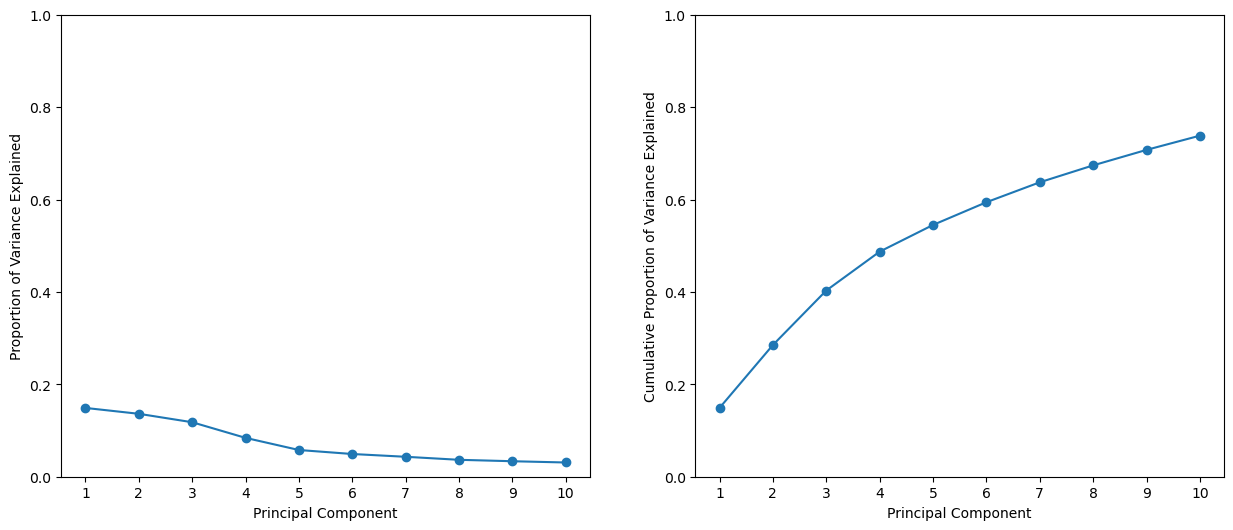

In [13]:
# Answer: Complete the code

fig , axes = plt.subplots(1, 2, figsize=(15, 6))

ticks = np.arange(pcaDD.n_components_)+1

ax = axes[0]
ax.plot(ticks, pcaDD.explained_variance_ratio_ ,marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks, pcaDD.explained_variance_ratio_.cumsum(),marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

### 3. Visualising data with PCA 

Question: 

Use PCA to visualise all the digit images in 2-dimensions. 
Create a 2-dimensional scatter plot where each item is coloured according to its class.

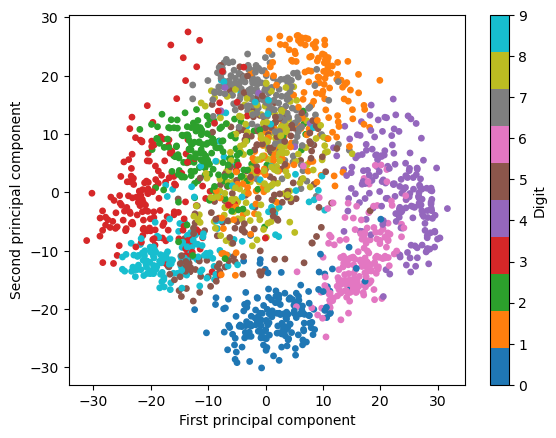

In [14]:
# Answer: Complete the code

plt.figure()

scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=digits.target, cmap="tab10", s=15)
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Digit")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Question: Visualise the first two PCA projection vectors (principal directions)

PCA produces new orthogonal directions in the 64-dimensional image space.
These directions (PC1, PC2, …) can be interpreted as “spatial patterns” that explain most of the variability in the dataset.

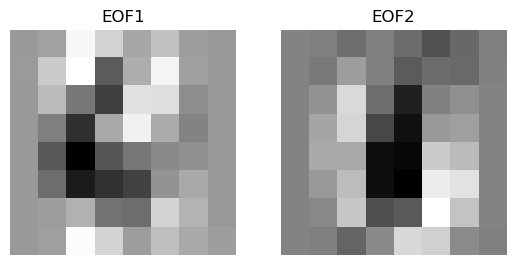

In [15]:
# Answer: Complete the code
plt.subplot(1, 2, 1)
plt.imshow(pcaDD.components_[0,:].reshape(8, 8), cmap=plt.cm.binary)
plt.title("EOF1")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("EOF2")
plt.imshow(pcaDD.components_[1,:].reshape(8, 8), cmap=plt.cm.binary)
plt.axis("off")
plt.show()